
# Machine Learning

# CA3

# Question 4B


## Text Analytics and Sentiment Analysis

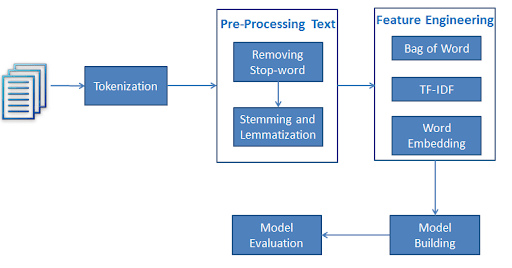

In [1]:
# imports

#Loading NLTK
import nltk

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# matplotlib
import matplotlib.pyplot as plt

# Text Analytics

In [2]:
#text source: https://www.nytimes.com/2021/05/21/opinion/ceasefire-israel-palestinian-territories.html

text="""The cease-fire between Hamas militants in Gaza and Israel didn’t come a second too soon.
Israelis should not have to live in fear of rockets raining down, which killed a dozen people living in Israel since fighting broke out 11 days ago. Nor should people in Gaza live in fear that they might become collateral damage from Israeli bombs. Israeli airstrikes and artillery killed at least 230 Palestinians, including militants and many civilians.
Israel has a right — even a responsibility — to put a stop to the rocket attacks at their source. More than 4,000 were fired at Israel from Gaza in 10 days, though most were intercepted by the Iron Dome antimissile system. But the fighting took an unbearable toll on civilians, the vast majority of them Palestinian. More than 60 children in Gaza were killed, tens of thousands of people were displaced, and hundreds of buildings were destroyed or severely damaged.
The most intractable problems facing Israel and the Palestinians cannot be bombed away. When the dust settles, the misery and resentment will remain, starting in motion the next round of fighting. It is not in the interests of Israel, the United States or the rest of the world to make life unlivable in Gaza or to see another generation of children grow into adulthood knowing no government but Hamas, no economy but blockade and no certainty about the future except periodic bombardment.
As this round of fighting ends, two million people remain penned into 141 square miles of Gaza, with no escape from the devastation and economic blockade. There is now civil unrest and sectarian violence in communities in Israel that no Iron Dome or separation wall can parry. Across the region, hundreds of thousands of Palestinians mounted a general strike, the largest peaceful demonstration of unity in many years.
"""

### Sentence Tokenization

In [3]:
# tokenise text
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['The cease-fire between Hamas militants in Gaza and Israel didn’t come a second too soon.', 'Israelis should not have to live in fear of rockets raining down, which killed a dozen people living in Israel since fighting broke out 11 days ago.', 'Nor should people in Gaza live in fear that they might become collateral damage from Israeli bombs.', 'Israeli airstrikes and artillery killed at least 230 Palestinians, including militants and many civilians.', 'Israel has a right — even a responsibility — to put a stop to the rocket attacks at their source.', 'More than 4,000 were fired at Israel from Gaza in 10 days, though most were intercepted by the Iron Dome antimissile system.', 'But the fighting took an unbearable toll on civilians, the vast majority of them Palestinian.', 'More than 60 children in Gaza were killed, tens of thousands of people were displaced, and hundreds of buildings were destroyed or severely damaged.', 'The most intractable problems facing Israel and the Palestinian

In [4]:
# breakup tokenised text into individual words
tokenized_word=word_tokenize(text)
tokenized_sent = tokenized_word
print(tokenized_word)

['The', 'cease-fire', 'between', 'Hamas', 'militants', 'in', 'Gaza', 'and', 'Israel', 'didn', '’', 't', 'come', 'a', 'second', 'too', 'soon', '.', 'Israelis', 'should', 'not', 'have', 'to', 'live', 'in', 'fear', 'of', 'rockets', 'raining', 'down', ',', 'which', 'killed', 'a', 'dozen', 'people', 'living', 'in', 'Israel', 'since', 'fighting', 'broke', 'out', '11', 'days', 'ago', '.', 'Nor', 'should', 'people', 'in', 'Gaza', 'live', 'in', 'fear', 'that', 'they', 'might', 'become', 'collateral', 'damage', 'from', 'Israeli', 'bombs', '.', 'Israeli', 'airstrikes', 'and', 'artillery', 'killed', 'at', 'least', '230', 'Palestinians', ',', 'including', 'militants', 'and', 'many', 'civilians', '.', 'Israel', 'has', 'a', 'right', '—', 'even', 'a', 'responsibility', '—', 'to', 'put', 'a', 'stop', 'to', 'the', 'rocket', 'attacks', 'at', 'their', 'source', '.', 'More', 'than', '4,000', 'were', 'fired', 'at', 'Israel', 'from', 'Gaza', 'in', '10', 'days', ',', 'though', 'most', 'were', 'intercepted', '

### Frequency Distribution

In [5]:
# frequency distrinution
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 187 samples and 335 outcomes>


In [6]:
# frequency distribution of top 5 words
fdist.most_common(5)

[('the', 16), ('.', 14), ('of', 14), (',', 14), ('in', 13)]

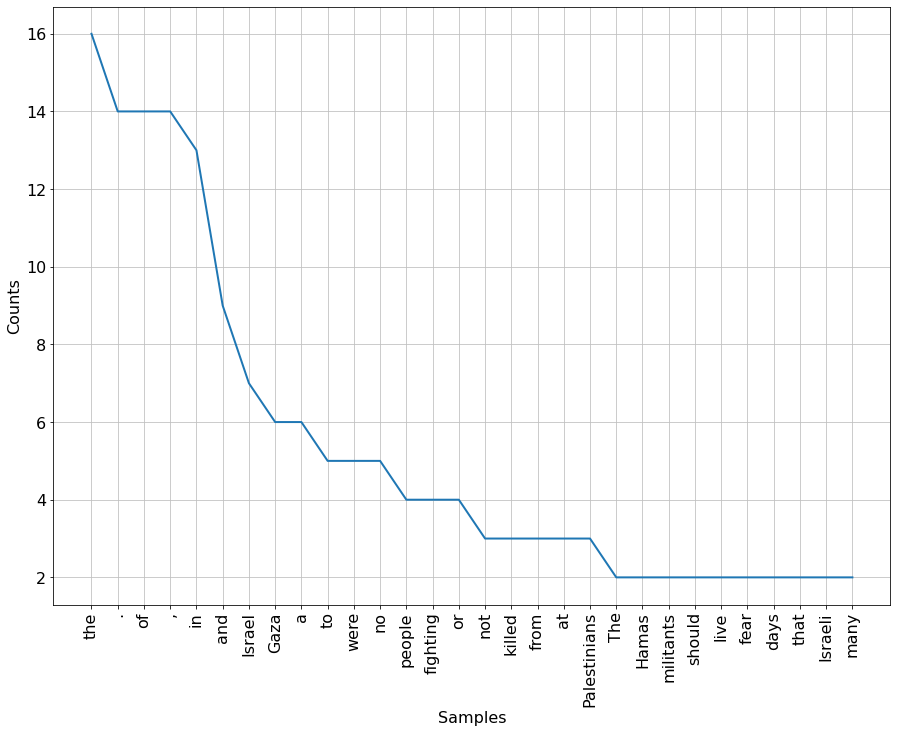

In [7]:
# Frequency Distribution Plot

plt.rcParams.update({'font.size': 16})
fig = plt.figure(figsize=(15,11))
fdist.plot(30,cumulative=False)
plt.show()

In [8]:
# stop words
stop_words=set(stopwords.words("english"))
print(stop_words)

{"doesn't", 'does', 'which', 's', 'yourselves', 'needn', 'then', 'herself', "shouldn't", 'can', 'if', 'once', 'wouldn', "hadn't", 'no', 'ours', 'and', 'during', 'aren', 'there', "don't", 'when', "won't", 'those', 'hers', 'has', 'into', "you've", "it's", 'or', 'about', 'doing', "wasn't", 'd', 'who', 'just', 'am', 'she', 'itself', 'above', 'ain', 'our', 'o', "haven't", 'myself', "mightn't", 'where', "you're", "she's", "mustn't", "you'd", 'an', 'you', 'isn', 'from', 'mustn', 'shan', 'any', 'these', 'up', 'again', 'this', 'a', 'between', 'of', 'i', 'until', 'over', 'own', 'did', 'yourself', 'its', 'should', 'it', 'after', 'in', 'now', 'down', 'by', "weren't", 'so', 'too', 'other', 'is', 'off', 'through', "should've", 'having', 'more', 'didn', 'was', 'have', "that'll", 'hadn', "you'll", 'against', 'most', 've', 'yours', 'were', 'doesn', 'what', 'same', 'out', 'he', "needn't", "couldn't", 'shouldn', 're', 'the', 'at', 'themselves', 'been', "shan't", 'why', 'than', 'them', 'theirs', 'be', 'mi

### Removing Stop Words

In [9]:
# remove extremely common words / stop words
filtered_sent=[]
for w in tokenized_sent:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_sent)
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: ['The', 'cease-fire', 'between', 'Hamas', 'militants', 'in', 'Gaza', 'and', 'Israel', 'didn', '’', 't', 'come', 'a', 'second', 'too', 'soon', '.', 'Israelis', 'should', 'not', 'have', 'to', 'live', 'in', 'fear', 'of', 'rockets', 'raining', 'down', ',', 'which', 'killed', 'a', 'dozen', 'people', 'living', 'in', 'Israel', 'since', 'fighting', 'broke', 'out', '11', 'days', 'ago', '.', 'Nor', 'should', 'people', 'in', 'Gaza', 'live', 'in', 'fear', 'that', 'they', 'might', 'become', 'collateral', 'damage', 'from', 'Israeli', 'bombs', '.', 'Israeli', 'airstrikes', 'and', 'artillery', 'killed', 'at', 'least', '230', 'Palestinians', ',', 'including', 'militants', 'and', 'many', 'civilians', '.', 'Israel', 'has', 'a', 'right', '—', 'even', 'a', 'responsibility', '—', 'to', 'put', 'a', 'stop', 'to', 'the', 'rocket', 'attacks', 'at', 'their', 'source', '.', 'More', 'than', '4,000', 'were', 'fired', 'at', 'Israel', 'from', 'Gaza', 'in', '10', 'days', ',', 'though', 'most', 'wer

### Steming

In [10]:
# Stemming reduces a word to its stem by identifying and removing affixes (e.g., gerunds) 

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['The', 'cease-fire', 'Hamas', 'militants', 'Gaza', 'Israel', '’', 'come', 'second', 'soon', '.', 'Israelis', 'live', 'fear', 'rockets', 'raining', ',', 'killed', 'dozen', 'people', 'living', 'Israel', 'since', 'fighting', 'broke', '11', 'days', 'ago', '.', 'Nor', 'people', 'Gaza', 'live', 'fear', 'might', 'become', 'collateral', 'damage', 'Israeli', 'bombs', '.', 'Israeli', 'airstrikes', 'artillery', 'killed', 'least', '230', 'Palestinians', ',', 'including', 'militants', 'many', 'civilians', '.', 'Israel', 'right', '—', 'even', 'responsibility', '—', 'put', 'stop', 'rocket', 'attacks', 'source', '.', 'More', '4,000', 'fired', 'Israel', 'Gaza', '10', 'days', ',', 'though', 'intercepted', 'Iron', 'Dome', 'antimissile', 'system', '.', 'But', 'fighting', 'took', 'unbearable', 'toll', 'civilians', ',', 'vast', 'majority', 'Palestinian', '.', 'More', '60', 'children', 'Gaza', 'killed', ',', 'tens', 'thousands', 'people', 'displaced', ',', 'hundreds', 'buildings', 'destro

# Sentiment Analysis

In [11]:
# Import pandas
import pandas as pd

### Twitter Sentiment Analysis
#### Dataset
url: https://www.kaggle.com/kazanova/sentiment140/download


Context
This is the sentiment140 dataset. It contains 1,600,000 tweets extracted using the twitter api . The tweets have been annotated (0 = negative, 4 = positive) and they can be used to detect sentiment .

Content:

It contains the following 6 fields:

target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

ids: The id of the tweet ( 2087)

date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)

flag: The query (lyx). If there is no query, then this value is NO_QUERY.

user: the user that tweeted (robotickilldozr)

text: the text of the tweet (Lyx is cool)

In [12]:
# load dataset
tweets=pd.read_csv('Sentiment140.csv', encoding='latin', 
                   names = ['sentiment','id','date','query','user','tweet'])

In [13]:
# see top 5 rows
tweets.head()

,sentiment,id,date,query,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [14]:
# dataset information
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   query      1600000 non-null  object
 4   user       1600000 non-null  object
 5   tweet      1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [15]:
# dataset shape
print('Dataset shape: {}'.format(tweets.shape))

Dataset shape: (1600000, 6)


In [16]:
# select 100,000 twets only at random
tweets = tweets.sample(n=100000,random_state=51)

In [17]:
tweets.sentiment.value_counts()

0    50255
4    49745
Name: sentiment, dtype: int64

In [18]:
# 0=negative,4=Positive. Replace 4 with 1
tweets['sentiment']=tweets['sentiment'].replace(4,1)

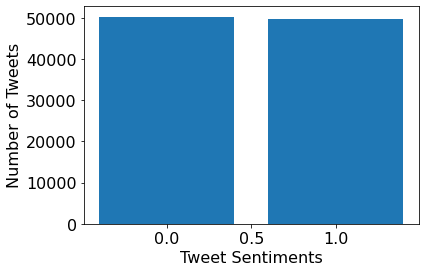

In [19]:
# check for class imbalance
Sentiment_count=tweets.groupby('sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['tweet'])
plt.xlabel('Tweet Sentiments')
plt.ylabel('Number of Tweets')
plt.show()

In [20]:
# drop unneccessary columns
tweets.drop(['date','query','user'], axis=1, inplace=True)
tweets.drop('id', axis=1, inplace=True)
tweets.head(5)

,sentiment,tweet
242402,0,@karenhorns I need to look for an apartment.
910432,1,"Happy mother's day!!! oh, I love my mom.. hehe..."
818044,1,Its such a nice day!!! Hello Spring
683959,0,I miss @ohyesitsmarc. I dislike it when he lea...
667515,0,"Liberty is suffering today with a fever, a swo..."


In [21]:
# check for missing values
tweets.isnull().sum()

sentiment    0
tweet        0
dtype: int64

In [22]:
#tokenizer to remove unwanted elements from tweets like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(tweets['tweet'])

In [23]:
# train - test data split
X_train, X_test, y_train, y_test = train_test_split(
    text_counts, tweets['sentiment'], test_size=0.3, random_state=51)

In [24]:
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
y_pred= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, y_pred))

MultinomialNB Accuracy: 0.7475666666666667


In [25]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[11888,  3152],
       [ 4421, 10539]], dtype=int64)

In [26]:
# TF-IDF 
tf=TfidfVectorizer()
text_tf= tf.fit_transform(tweets['tweet'])

In [27]:
print(text_tf.shape)
print(tweets['tweet'].shape)

(100000, 96827)
(100000,)


In [28]:
# train - test split
X_train, X_test, y_train, y_test = train_test_split(
    text_tf, tweets['sentiment'], test_size=0.3, random_state=123)

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
y_pred= clf.predict(X_test)

# model accuracy
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, y_pred))

MultinomialNB Accuracy: 0.7624


In [30]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[12582,  2588],
       [ 4540, 10290]], dtype=int64)

#### Reference: https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk